In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [86]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [87]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [88]:
# Check tables 
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [89]:
# Check tables 
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [90]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [91]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse = list(duplicate_rows["Mouse ID"].unique())
print(f"{duplicate_mouse}") 

['g989']


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[(combined_df["Mouse ID"] != "g989")]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [94]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [95]:
# Summary Statistics 

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_drug = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_drug = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_drug = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_drug = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

C:\Users\rebec\AppData\Local\Temp\ipykernel_18664\938769272.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_drug = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\rebec\AppData\Local\Temp\ipykernel_18664\938769272.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_drug = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\rebec\AppData\Local\Temp\ipykernel_18664\938769272.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeri

In [97]:
# Assemble the resulting series into a single summary DataFrame.
summary_drug_df = clean_df[["Drug Regimen"]]
summary_drug_df = summary_drug_df.drop_duplicates()
summary_drug_df = summary_drug_df.sort_values("Drug Regimen")
summary_drug_df = summary_drug_df.set_index("Drug Regimen")

summary_drug_df["Mean Tumor Volume"] = mean_drug
summary_drug_df["Median Tumor Volume"] = median_drug
summary_drug_df["Tumor Volume Variance"] = variance_drug
summary_drug_df["Tumor Volume Std. Dev."] = std_dev_drug
summary_drug_df["Tumor Volume Std. Err."] = sem_drug
summary_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Bar and Pie Charts

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.plot.bar(x=(clean_df["Drug Regimen"]), y=)

SyntaxError: invalid syntax (2779441839.py, line 2)

Text(0, 0.5, 'Number of Mice Tested')

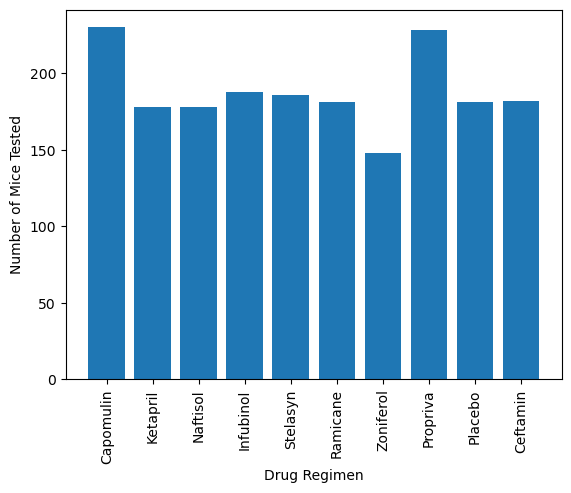

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = clean_df["Drug Regimen"].unique()
x_axis = np.arange(len(drug))
timepoints = clean_df.groupby('Drug Regimen')['Timepoint'].count()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation="vertical")

plt.bar(x_axis, timepoints, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")